# Author

***Written by Ho Sy The***

Hanoi University of Science and Technology

IT1 04 - K65.

*Github: https://github.com/hsthe29*

# Prepare

In [1]:
from __future__ import print_function, unicode_literals, division
from sympy import symbols, diff, lambdify, simplify, Poly, expand
from sympy.solvers import solve
import numpy as np
import matplotlib.pyplot as plt

In [2]:
x1, x2 = symbols('x1 x2')

In [4]:
f = simplify('(x1**2 +x2 - 7) ** 2 + (x1 - x2 + 1) ** 2')
grad = np.array([f.diff(x1), f.diff(x2)])
hessian_matrix = np.array([[gr.diff(x1), gr.diff(x2)] for gr in grad])

grad_val = lambdify([x1, x2], grad)
hessian_matrix_val = lambdify([x1, x2], hessian_matrix)

In [17]:
print(grad)
s = [-0.5, 3.625]
print(grad_val(*s))

[4*x1*(x1**2 + x2 - 7) + 2*x1 - 2*x2 + 2 2*x1**2 - 2*x1 + 4*x2 - 16]
[0.0, 0.0]


# Newton's Method

In [27]:
X = np.array([[1, 6]])

iterator = 1
flag = True

while iterator < 100:
  if np.linalg.norm(grad_val(*X[-1])) < 1e-5:
    print('Found x:', X[-1])
    print('Trace of x:\n',X)
    flag = False
    break
  p = np.linalg.inv(hessian_matrix_val(*X[-1]))
  x_new = X[-1] - p @ grad_val(*X[-1])
  X = np.append(X, [x_new], axis = 0)
  iterator += 1

if flag:
  print('No Solution')

Found x: [2. 3.]
Trace of x:
 [[1.         6.        ]
 [2.33333333 3.33333333]
 [2.07648725 2.91532893]
 [2.00362819 2.99720536]
 [2.0000094  2.99999245]
 [2.         3.        ]]


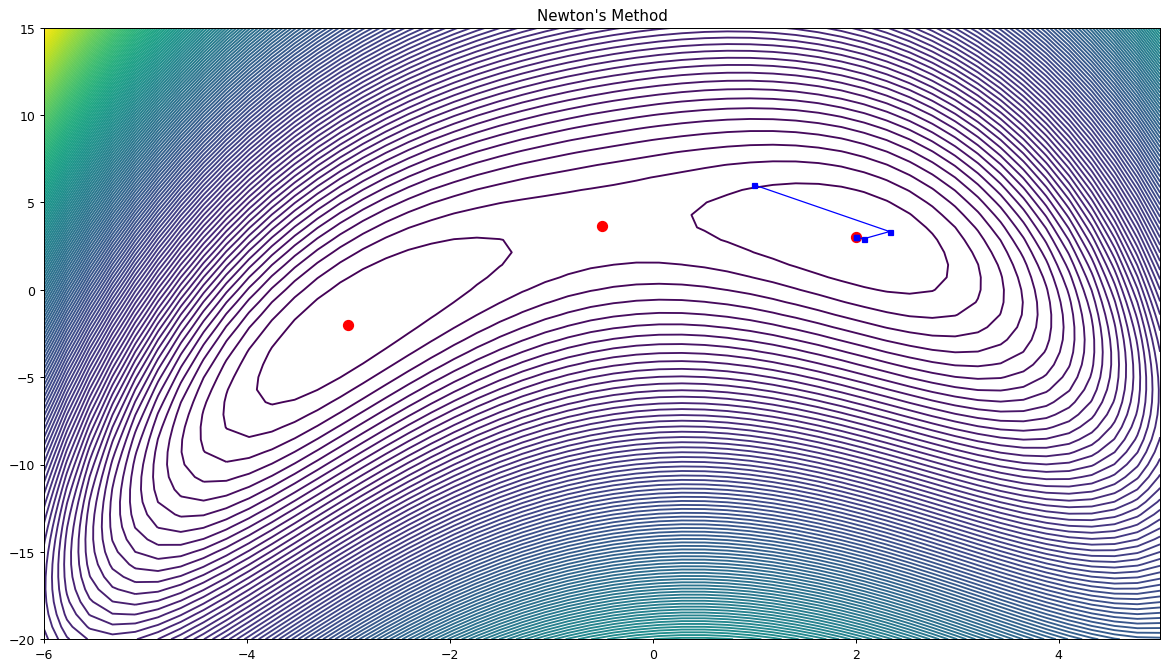

In [32]:
plt.figure(figsize=(16, 9), dpi= 90, facecolor='w', edgecolor='k')

n = 50

def f(x,y):
  return (x ** 2 + y -7) ** 2 + (x - y + 1) ** 2

x_ = np.linspace(-6, 5, n)
y_ = np.linspace(-20, 15, n)

x, y = np.meshgrid(x_, y_)


plt.plot(2, 3, 'ro', markersize=8)
plt.plot(-0.5, 3.625, 'ro', markersize=8)
plt.plot(-3, -2, 'ro', markersize=8)
plt.plot(X[:, 0], X[:, 1], 'b', linewidth = 1)
plt.plot(X[:, 0], X[:, 1], 'bs', markersize=4)

plt.contour(x, y, f(x, y), 200)

plt.title('Newton\'s Method')

plt.show()